In [ ]:
 !pip install pandas
!pip install matplotlib
!pip install seaborn

^C


In [1]:
import pandas as pd

# Configuration

In [2]:
data_path = r"C:\Users\pltel\Downloads"

In [3]:
# Load the data
data = pd.read_table(f"{data_path}/validated.tsv")

C:\Users\pltel\AppData\Local\Temp\ipykernel_13784\1580107400.py:2: DtypeWarning: Columns (4,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(f"{data_path}/validated.tsv")


In [4]:
print(len(data))
print(data.columns)

739181
Index(['client_id', 'path', 'sentence_id', 'sentence', 'sentence_domain',
       'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant',
       'locale', 'segment'],
      dtype='object')


In [5]:
data.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,003a1f0d9db0b338e7f3d24e9df78e4db72d94f3cdb407...,common_voice_fr_40182744.mp3,4f65c0b607adeb91cfb4d9fecec37beb32742e77e582fb...,Il va ensuite se positionner sur le dos de la ...,NaN,2,0,NaN,NaN,NaN,NaN,fr,NaN
1,00712edd26a2e44012180c1aa2f3f213e115b7bf34fa48...,common_voice_fr_19738183.mp3,0c21a1306e1e041217bb1b685879c5494f2af43be71e3b...,Ce dernier a évolué tout au long de l'histoire...,NaN,2,0,NaN,NaN,NaN,NaN,fr,NaN
2,010604da6dea36016664c09e5bc94a68a82d2360b36562...,common_voice_fr_40156720.mp3,4f54bf66a5cde6df8d3927698ab462c96f4b86a09a5cf8...,Je ne comprends pas… répondit Harbert,NaN,2,0,NaN,NaN,Français de France,NaN,fr,NaN
3,0140a1c33ac215134f183e8c24a0b5f5e5dbf85b4c7464...,common_voice_fr_27024649.mp3,2f64f5645b7675b84a16544a5082c394db6d0ab60f3360...,Son actionnaire majoritaire est le Conseil ter...,NaN,2,1,NaN,NaN,NaN,NaN,fr,NaN
4,0174221e49c787eb39c0f8af02c17d09bb19f73daf70df...,common_voice_fr_19364697.mp3,056073a594320790af7555fd5a7b18add24836a88c3ce5...,Ce site contient quatre tombeaux de la dynasti...,NaN,2,0,NaN,NaN,NaN,NaN,fr,NaN


In [6]:
data.describe()

,up_votes,down_votes,variant
count,739181.000000,739181.00000,0.0
mean,2.169715,0.10659,NaN
std,0.593658,0.33175,NaN
min,2.000000,0.00000,NaN
25%,2.000000,0.00000,NaN
50%,2.000000,0.00000,NaN
75%,2.000000,0.00000,NaN
max,15.000000,8.00000,NaN


In [7]:
# Hunt NaN values
data.isna().sum()

client_id               0
path                    0
sentence_id             0
sentence                0
sentence_domain    739174
up_votes                0
down_votes              0
age                266932
gender             225323
accents            223159
variant            739181
locale                  0
segment            719183
dtype: int64

In [8]:
# Print every unique value for each column
columns_to_print = [ 'age', 'gender', 'accents']
data_selected_to_print = data[columns_to_print]
data_selected_to_print.dropna(subset=["accents"],inplace=True)
for column in columns_to_print:
    print(f"{column}: {data[column].unique()}")

age: [nan 'fifties' 'thirties' 'twenties' 'teens' 'fourties' 'sixties'
 'seventies' 'eighties']
gender: [nan 'male_masculine' 'female_feminine' 'do_not_wish_to_say' 'non-binary']
accents: [nan 'Français de France' 'Français du Canada' 'Français de Guadeloupe'
 'Français de Belgique' 'Français de Marseille ' 'Français de Suisse'
 'Français du Bénin' 'Français de Côte d’Ivoire'
 'Français de l’Île Maurice' 'Français d’Algérie' 'Français du Sénégal'
 'Français légèrement québécois ' 'Français du Portugal'
 'Français du Royaume-Uni' 'Français du Maroc' 'Français du Gabon'
 'Toulousain' 'Français de France,Français du Royaume-Uni'
 'Français du Cameroun' 'Français de France,Japonais'
 'Français de Madagascar' 'Français d’Allemagne' 'Marseillais ! '
 'quebecois du quebec' 'Français des États-Unis' 'Français de France,nord'
 'Français de La Réunion' 'Français avec accent écossais '
 'Accent modéré de Marseille.' 'Accent du sud ouest Hautes Pyrénées '
 'Français de France, non marqué par une l

C:\Users\pltel\AppData\Local\Temp\ipykernel_13784\191941491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_to_print.dropna(subset=["accents"],inplace=True)


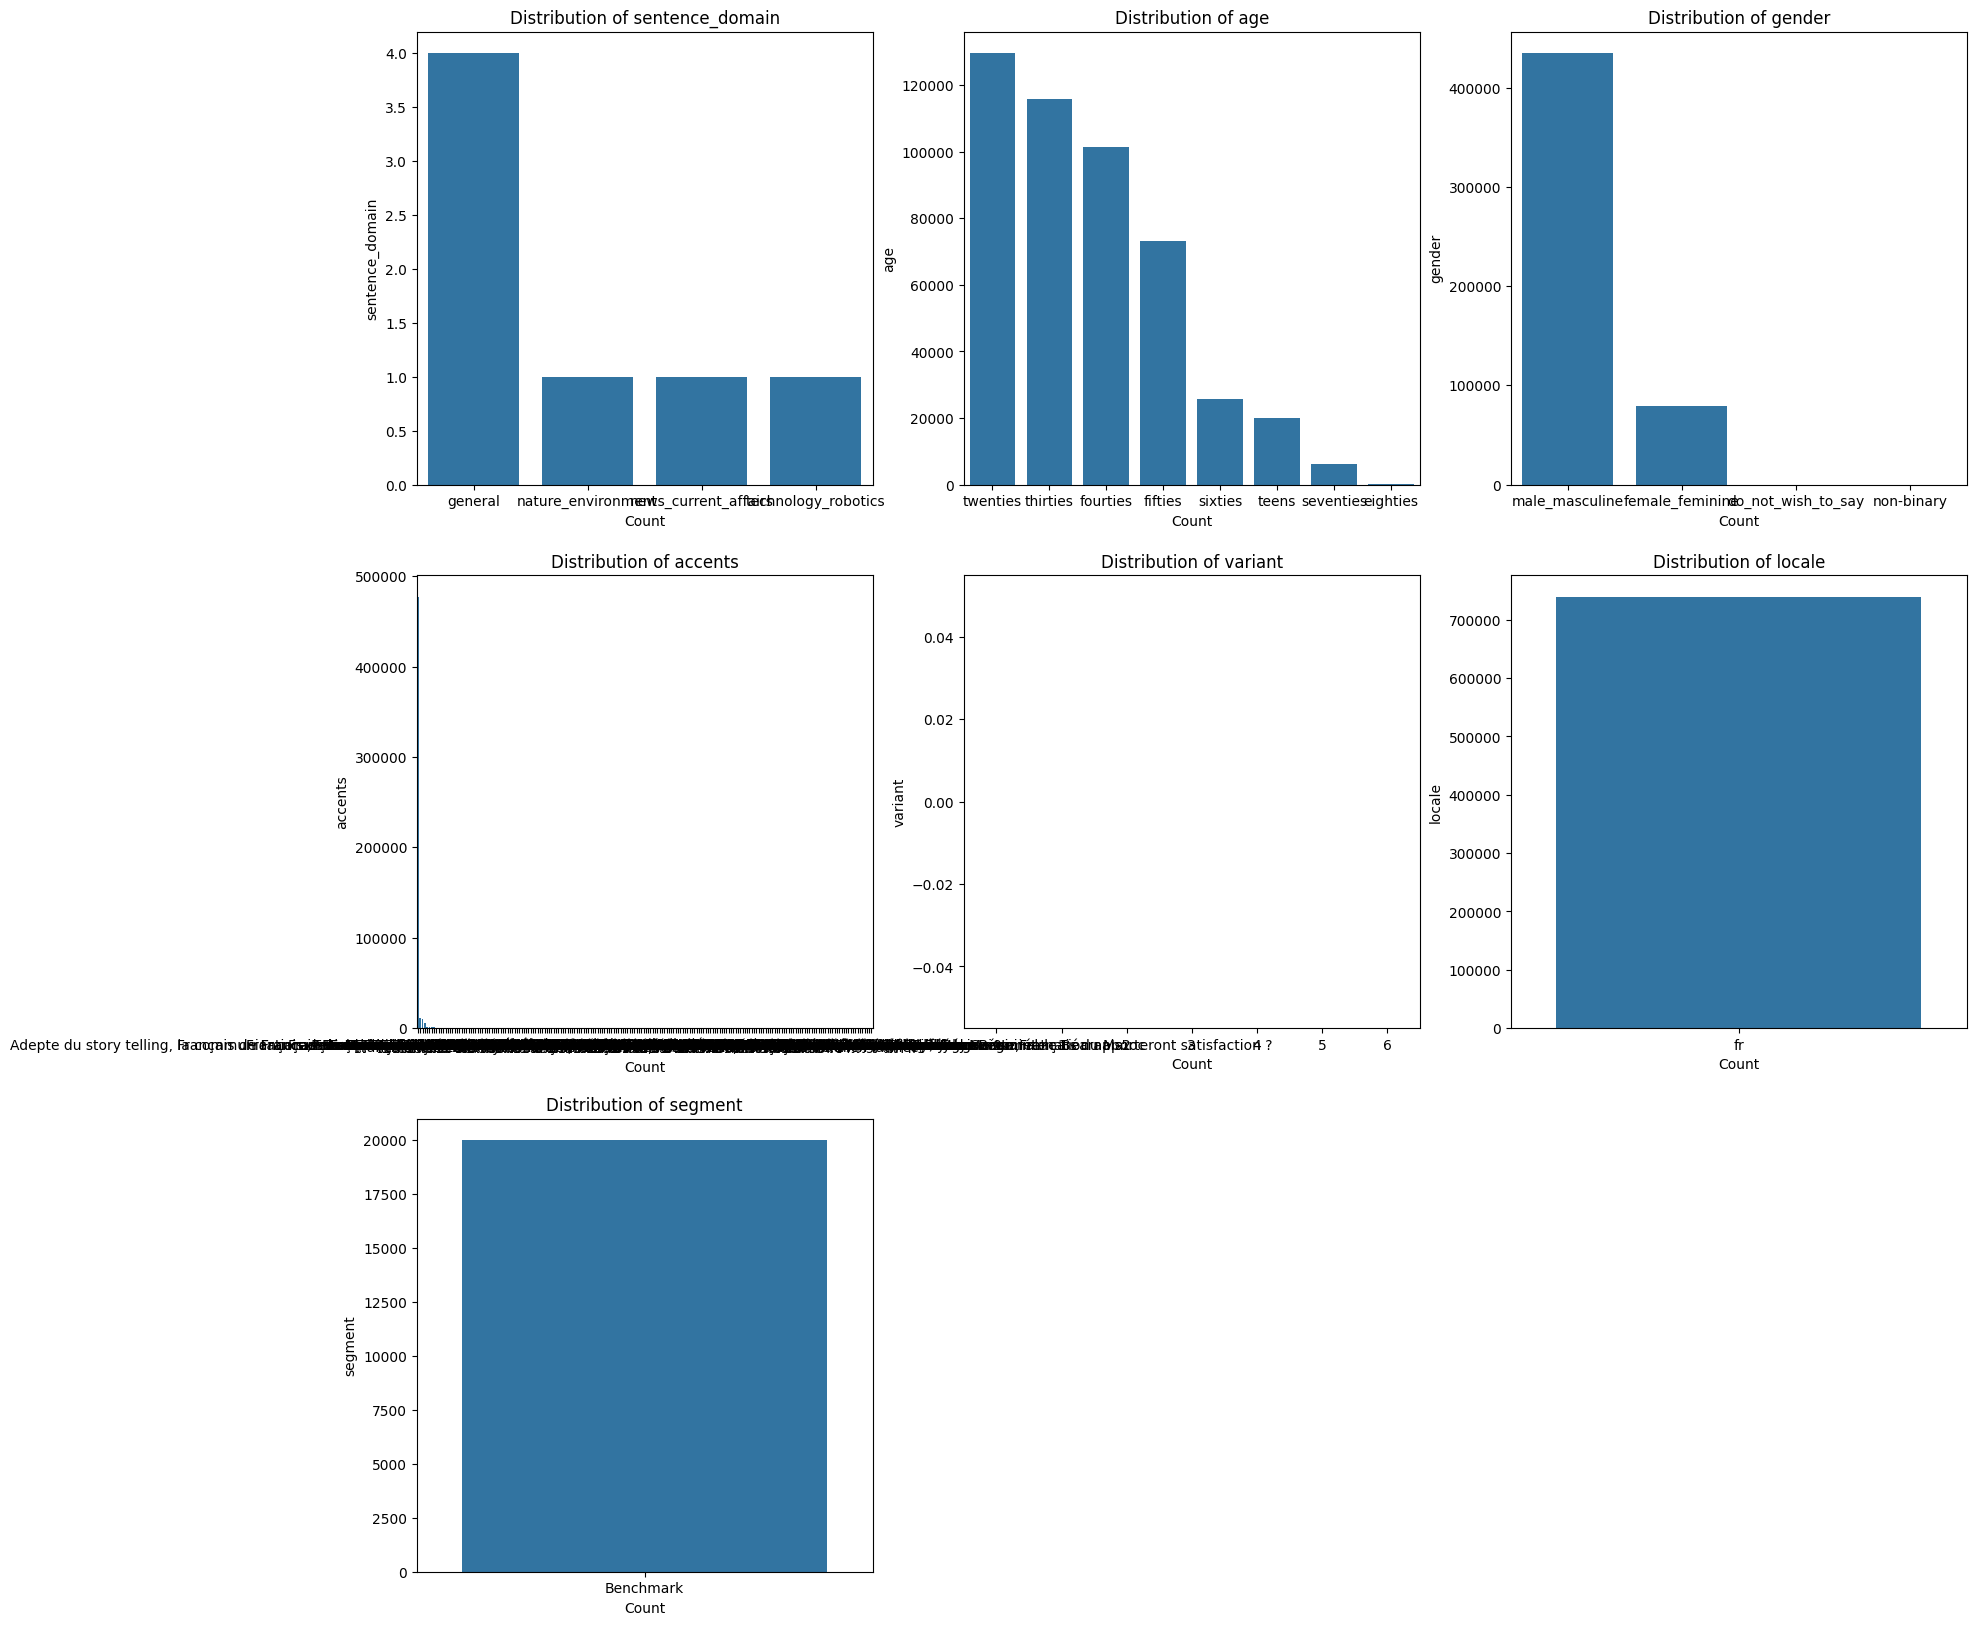

In [12]:
# Visualise repartition of the data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data distribution for each column
plt.figure(figsize=(20, 20))
for i,column in enumerate(data_selected_to_print.columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=column, data=data, order=data_selected_to_print[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
plt.show()

In [9]:
# Draw correlation matrix
# First encode every categorical column
from sklearn.preprocessing import LabelEncoder

data_encoded = data_selected_to_print.drop(columns=["variant","locale"]).copy()
data_encoded = data_encoded.apply(LabelEncoder().fit_transform)

correlation_matrix = data_encoded.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

KeyError: "['variant', 'locale'] not found in axis"

In [10]:
#count every accen where Marseille is in it
# marseille_accent = data_selected_to_print['accents'].str.contains("marseille").count()
marseille_accent = data_selected_to_print['accents'].str.contains("marseil", case=False, na=False).sum()
print(f"Number of accents containing 'Marseille': {marseille_accent}")

# Display unique values excluding the filtered ones
remaining_accents = data_selected_to_print[~data_selected_to_print['accents'].str.contains("marseil", case=False, na=False)]
print("Unique values of accents excluding 'Marseille':")
print(remaining_accents['accents'].unique())

Number of accents containing 'Marseille': 178
Unique values of accents excluding 'Marseille':
['Français de France' 'Français du Canada' 'Français de Guadeloupe'
 'Français de Belgique' 'Français de Suisse' 'Français du Bénin'
 'Français de Côte d’Ivoire' 'Français de l’Île Maurice'
 'Français d’Algérie' 'Français du Sénégal'
 'Français légèrement québécois ' 'Français du Portugal'
 'Français du Royaume-Uni' 'Français du Maroc' 'Français du Gabon'
 'Toulousain' 'Français de France,Français du Royaume-Uni'
 'Français du Cameroun' 'Français de France,Japonais'
 'Français de Madagascar' 'Français d’Allemagne' 'quebecois du quebec'
 'Français des États-Unis' 'Français de France,nord'
 'Français de La Réunion' 'Français avec accent écossais '
 'Accent du sud ouest Hautes Pyrénées '
 'Français de France, non marqué par une langue régionale ' 'Neutre'
 'Français d’Algérie,Français de France'
 'Un français classique sans accent' 'Français du Béarn' 'île-de-France'
 'Français de Roumanie' 'Béni

In [79]:
print(len(data_selected_to_print))

516022


In [11]:
import pandas as pd
from collections import Counter
import re

# Example data

data_accent_not_null = data_selected_to_print.dropna(subset=['accents'])
data_accent_not_null['accents_original'] = data_accent_not_null['accents']
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.lower()
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('francais de', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('francais du', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('français de', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('français du', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace("francais d", '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace("français d", '', case=False)

# of accents is like france,*** only keep ***
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('france,', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace(',france', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('france ,', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace(', france', '', case=False)

data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('accent', '', case=False)
# Tokenize the labels and count word frequencies
all_words = []
for label in data_accent_not_null['accents']:
    words = re.findall(r'\w+', label.lower())
    all_words.extend([word for word in words if len(word) >= 5])


word_freq = Counter(all_words)

# Identify common words (you can set a threshold for frequency)
# common_words = [word for word, freq in word_freq.items() if freq > 1]
common_words = [word for word, freq in word_freq.most_common()]


# Function to assign group based on common words
def assign_group(label):
    for word in common_words:
        if word in label.lower():
            return word.capitalize()
    return 'Other'

# Apply the function to the 'accent' column
data_accent_not_null['accent_grouped'] = data_accent_not_null['accents'].apply(assign_group)

# Count the frequency of each group
group_counts = data_accent_not_null['accent_grouped'].value_counts().to_dict()

# Add the population count to the DataFrame
data_accent_not_null['group_population'] = data_accent_not_null['accent_grouped'].map(group_counts)
# Create a new DataFrame to reference the groups
group_reference = pd.DataFrame(list(group_counts.items()), columns=['Group', 'Population'])

print(group_reference)
# print(data_accent_not_null)

       Group  Population
0     France      477612
1     Canada       11150
2   Belgique       10488
3     Suisse        5910
4    Réunion        1249
..       ...         ...
84  Béarnais           3
85  Angevins           3
86   Maurice           2
87    Quebec           1
88  Japonais           1

[89 rows x 2 columns]


In [69]:
# show for each group the 15 first rows of the data
for group in group_reference['Group']:
    print(f"Group: {group}")
    print(data_accent_not_null[data_accent_not_null['accent_grouped'] == group][['accents', 'accents_original']].head(5))

Group: France
    accents    accents_original
29   france  Français de France
47   france  Français de France
56   france  Français de France
57   france  Français de France
65   france  Français de France
Group: Canada
     accents    accents_original
7     canada  Français du Canada
178   canada  Français du Canada
182   canada  Français du Canada
453   canada  Français du Canada
541   canada  Français du Canada
Group: Belgique
                   accents                            accents_original
212               belgique                        Français de Belgique
990               belgique                        Français de Belgique
991               belgique                        Français de Belgique
2580   belgique,s pays-bas  Français de Belgique,Français des Pays-Bas
2581   belgique,s pays-bas  Français de Belgique,Français des Pays-Bas
Group: Suisse
      accents    accents_original
3665   suisse  Français de Suisse
3666   suisse  Français de Suisse
3667   suisse  Français 